In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression
import statsmodels.api as sm
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [2]:
df_p = pd.read_csv('/Users/pablo/OneDrive/Documents/MASTERS PA/archive/Pitching.csv')
df_s = pd.read_csv('/Users/pablo/OneDrive/Documents/MASTERS PA/archive/Salaries.csv')
df_p.head(), df_s.head()

(    playerID  yearID  stint teamID lgID   W   L   G  GS  CG  ...  IBB  WP  \
 0  bechtge01    1871      1    PH1  NaN   1   2   3   3   2  ...  NaN NaN   
 1  brainas01    1871      1    WS3  NaN  12  15  30  30  30  ...  NaN NaN   
 2  fergubo01    1871      1    NY2  NaN   0   0   1   0   0  ...  NaN NaN   
 3  fishech01    1871      1    RC1  NaN   4  16  24  24  22  ...  NaN NaN   
 4  fleetfr01    1871      1    NY2  NaN   0   1   1   1   1  ...  NaN NaN   
 
    HBP  BK  BFP  GF    R  SH  SF  GIDP  
 0  NaN   0  NaN NaN   42 NaN NaN   NaN  
 1  NaN   0  NaN NaN  292 NaN NaN   NaN  
 2  NaN   0  NaN NaN    9 NaN NaN   NaN  
 3  NaN   0  NaN NaN  257 NaN NaN   NaN  
 4  NaN   0  NaN NaN   21 NaN NaN   NaN  
 
 [5 rows x 30 columns],
    yearID teamID lgID   playerID  salary
 0    1985    ATL   NL  barkele01  870000
 1    1985    ATL   NL  bedrost01  550000
 2    1985    ATL   NL  benedbr01  545000
 3    1985    ATL   NL   campri01  633333
 4    1985    ATL   NL  ceronri01  625000)

In [3]:
df = pd.merge(df_p, df_s, on='playerID', how='left')
df

playerID  yearID_x  stint teamID_x lgID_x   W   L   G  GS  CG  ...  \
0       bechtge01      1871      1      PH1    NaN   1   2   3   3   2  ...   
1       brainas01      1871      1      WS3    NaN  12  15  30  30  30  ...   
2       fergubo01      1871      1      NY2    NaN   0   0   1   0   0  ...   
3       fishech01      1871      1      RC1    NaN   4  16  24  24  22  ...   
4       fleetfr01      1871      1      NY2    NaN   0   1   1   1   1  ...   
...           ...       ...    ...      ...    ...  ..  ..  ..  ..  ..  ...   
159078   zitoba01      2015      1      OAK     AL   0   0   3   2   0  ...   
159079   zitoba01      2015      1      OAK     AL   0   0   3   2   0  ...   
159080   zitoba01      2015      1      OAK     AL   0   0   3   2   0  ...   
159081   zitoba01      2015      1      OAK     AL   0   0   3   2   0  ...   
159082   zychto01      2015      1      SEA     AL   0   0  13   1   0  ...   

         BFP   GF    R   SH   SF  GIDP  yearID_y  teamID_y  lgID_y      salary  
0        NaN  NaN   42  NaN  NaN   NaN       NaN       NaN     NaN         NaN  
1        NaN  NaN  292  NaN  NaN   NaN       NaN       NaN     NaN         NaN  
2        NaN  NaN    9  NaN  NaN   NaN       NaN       NaN     NaN         NaN  
3        NaN  NaN  257  NaN  NaN   NaN       NaN       NaN     NaN         NaN  
4        NaN  NaN   21  NaN  NaN   NaN       NaN       NaN     NaN         NaN  
...      ...  ...  ...  ...  ...   ...       ...       ...     ...         ...  
159078  37.0  1.0    8  0.0  0.0   NaN    2010.0       SFN      NL  18500000.0  
159079  37.0  1.0    8  0.0  0.0   NaN    2011.0       SFN      NL  18500000.0  
159080  37.0  1.0    8  0.0  0.0   NaN    2012.0       SFN      NL  19000000.0  
159081  37.0  1.0    8  0.0  0.0   NaN    2013.0       SFN      NL  20000000.0  
159082  76.0  4.0    6  0.0  0.0   NaN       NaN       NaN     NaN         NaN  

[159083 rows x 34 columns]

In [4]:
(df['yearID_x'] >= 2000).sum()

69056

In [5]:
df = df[df['yearID_x'] >= 2000]
df

playerID  yearID_x  stint teamID_x lgID_x  W  L   G  GS  CG  ...  \
90027   abbotpa01      2000      1      SEA     AL  9  7  35  27   0  ...   
90028   abbotpa01      2000      1      SEA     AL  9  7  35  27   0  ...   
90029   abbotpa01      2000      1      SEA     AL  9  7  35  27   0  ...   
90030   abbotpa01      2000      1      SEA     AL  9  7  35  27   0  ...   
90031   abbotpa01      2000      1      SEA     AL  9  7  35  27   0  ...   
...           ...       ...    ...      ...    ... .. ..  ..  ..  ..  ...   
159078   zitoba01      2015      1      OAK     AL  0  0   3   2   0  ...   
159079   zitoba01      2015      1      OAK     AL  0  0   3   2   0  ...   
159080   zitoba01      2015      1      OAK     AL  0  0   3   2   0  ...   
159081   zitoba01      2015      1      OAK     AL  0  0   3   2   0  ...   
159082   zychto01      2015      1      SEA     AL  0  0  13   1   0  ...   

          BFP   GF   R   SH   SF  GIDP  yearID_y  teamID_y  lgID_y      salary  
90027   766.0  2.0  89  1.0  4.0   NaN    1990.0       MIN      AL    100000.0  
90028   766.0  2.0  89  1.0  4.0   NaN    1992.0       MIN      AL    126000.0  
90029   766.0  2.0  89  1.0  4.0   NaN    1999.0       SEA      AL    235000.0  
90030   766.0  2.0  89  1.0  4.0   NaN    2000.0       SEA      AL    285000.0  
90031   766.0  2.0  89  1.0  4.0   NaN    2001.0       SEA      AL   1700000.0  
...       ...  ...  ..  ...  ...   ...       ...       ...     ...         ...  
159078   37.0  1.0   8  0.0  0.0   NaN    2010.0       SFN      NL  18500000.0  
159079   37.0  1.0   8  0.0  0.0   NaN    2011.0       SFN      NL  18500000.0  
159080   37.0  1.0   8  0.0  0.0   NaN    2012.0       SFN      NL  19000000.0  
159081   37.0  1.0   8  0.0  0.0   NaN    2013.0       SFN      NL  20000000.0  
159082   76.0  4.0   6  0.0  0.0   NaN       NaN       NaN     NaN         NaN  

[69056 rows x 34 columns]

In [6]:
(df['salary'] >= 570500).sum()

40996

In [7]:
df = df[df['salary'] >= 570500].reset_index(drop=True)
df

playerID  yearID_x  stint teamID_x lgID_x  W  L   G  GS  CG  ...  \
0      abbotpa01      2000      1      SEA     AL  9  7  35  27   0  ...   
1      abbotpa01      2000      1      SEA     AL  9  7  35  27   0  ...   
2      abbotpa01      2000      1      SEA     AL  9  7  35  27   0  ...   
3      aceveju01      2000      1      MIL     NL  3  7  62   0   0  ...   
4      aceveju01      2000      1      MIL     NL  3  7  62   0   0  ...   
...          ...       ...    ...      ...    ... .. ..  ..  ..  ..  ...   
40991   zitoba01      2015      1      OAK     AL  0  0   3   2   0  ...   
40992   zitoba01      2015      1      OAK     AL  0  0   3   2   0  ...   
40993   zitoba01      2015      1      OAK     AL  0  0   3   2   0  ...   
40994   zitoba01      2015      1      OAK     AL  0  0   3   2   0  ...   
40995   zitoba01      2015      1      OAK     AL  0  0   3   2   0  ...   

         BFP    GF   R   SH   SF  GIDP  yearID_y  teamID_y  lgID_y      salary  
0      766.0   2.0  89  1.0  4.0   NaN    2001.0       SEA      AL   1700000.0  
1      766.0   2.0  89  1.0  4.0   NaN    2002.0       SEA      AL   3425000.0  
2      766.0   2.0  89  1.0  4.0   NaN    2004.0       TBA      AL    600000.0  
3      347.0  18.0  38  1.0  1.0   NaN    2000.0       MIL      NL    612500.0  
4      347.0  18.0  38  1.0  1.0   NaN    2002.0       DET      AL    850000.0  
...      ...   ...  ..  ...  ...   ...       ...       ...     ...         ...  
40991   37.0   1.0   8  0.0  0.0   NaN    2009.0       SFN      NL  18500000.0  
40992   37.0   1.0   8  0.0  0.0   NaN    2010.0       SFN      NL  18500000.0  
40993   37.0   1.0   8  0.0  0.0   NaN    2011.0       SFN      NL  18500000.0  
40994   37.0   1.0   8  0.0  0.0   NaN    2012.0       SFN      NL  19000000.0  
40995   37.0   1.0   8  0.0  0.0   NaN    2013.0       SFN      NL  20000000.0  

[40996 rows x 34 columns]

<Axes: xlabel='salary'>

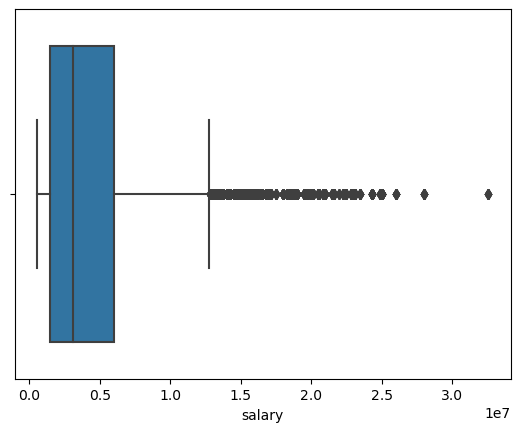

In [8]:
sns.boxplot(x='salary', data=df)

In [9]:
(df['salary'] <= 10000000).sum()

36525

In [10]:
df = df[df['salary'] <= 10000000].reset_index(drop=True)
df

playerID  yearID_x  stint teamID_x lgID_x  W  L   G  GS  CG  ...  \
0      abbotpa01      2000      1      SEA     AL  9  7  35  27   0  ...   
1      abbotpa01      2000      1      SEA     AL  9  7  35  27   0  ...   
2      abbotpa01      2000      1      SEA     AL  9  7  35  27   0  ...   
3      aceveju01      2000      1      MIL     NL  3  7  62   0   0  ...   
4      aceveju01      2000      1      MIL     NL  3  7  62   0   0  ...   
...          ...       ...    ...      ...    ... .. ..  ..  ..  ..  ...   
36520   zitoba01      2015      1      OAK     AL  0  0   3   2   0  ...   
36521   zitoba01      2015      1      OAK     AL  0  0   3   2   0  ...   
36522   zitoba01      2015      1      OAK     AL  0  0   3   2   0  ...   
36523   zitoba01      2015      1      OAK     AL  0  0   3   2   0  ...   
36524   zitoba01      2015      1      OAK     AL  0  0   3   2   0  ...   

         BFP    GF   R   SH   SF  GIDP  yearID_y  teamID_y  lgID_y      salary  
0      766.0   2.0  89  1.0  4.0   NaN    2001.0       SEA      AL   1700000.0  
1      766.0   2.0  89  1.0  4.0   NaN    2002.0       SEA      AL   3425000.0  
2      766.0   2.0  89  1.0  4.0   NaN    2004.0       TBA      AL    600000.0  
3      347.0  18.0  38  1.0  1.0   NaN    2000.0       MIL      NL    612500.0  
4      347.0  18.0  38  1.0  1.0   NaN    2002.0       DET      AL    850000.0  
...      ...   ...  ..  ...  ...   ...       ...       ...     ...         ...  
36520   37.0   1.0   8  0.0  0.0   NaN    2003.0       OAK      AL   1000000.0  
36521   37.0   1.0   8  0.0  0.0   NaN    2004.0       OAK      AL   3000000.0  
36522   37.0   1.0   8  0.0  0.0   NaN    2005.0       OAK      AL   5600000.0  
36523   37.0   1.0   8  0.0  0.0   NaN    2006.0       OAK      AL   7900000.0  
36524   37.0   1.0   8  0.0  0.0   NaN    2007.0       SFN      NL  10000000.0  

[36525 rows x 34 columns]

<Axes: xlabel='salary'>

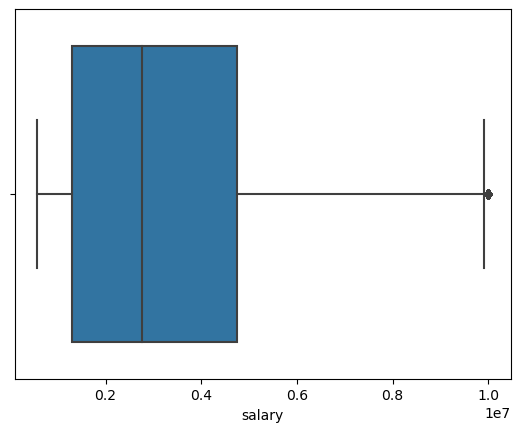

In [11]:
sns.boxplot(x='salary', data=df)

In [12]:
df.isna().sum()

playerID        0
yearID_x        0
stint           0
teamID_x        0
lgID_x          0
W               0
L               0
G               0
GS              0
CG              0
SHO             0
SV              0
IPouts          0
H               0
ER              0
HR              0
BB              0
SO              0
BAOpp          11
ERA            20
IBB             0
WP              0
HBP             0
BK              0
BFP             0
GF              0
R               0
SH              0
SF              0
GIDP        35177
yearID_y        0
teamID_y        0
lgID_y          0
salary          0
dtype: int64

In [13]:
columns_to_drop = ['lgID_x', 'yearID_y', 'teamID_y', 'GIDP', 'lgID_y', 'playerID',
                  'yearID_x', 'stint', 'teamID_x']
df.drop(columns=columns_to_drop, inplace=True)
df

W  L   G  GS  CG  SHO  SV  IPouts    H  ER  ...  IBB   WP  HBP  BK  \
0      9  7  35  27   0    0   0   537.0  164  84  ...  4.0  3.0  5.0   0   
1      9  7  35  27   0    0   0   537.0  164  84  ...  4.0  3.0  5.0   0   
2      9  7  35  27   0    0   0   537.0  164  84  ...  4.0  3.0  5.0   0   
3      3  7  62   0   0    0   0   248.0   77  35  ...  9.0  3.0  1.0   2   
4      3  7  62   0   0    0   0   248.0   77  35  ...  9.0  3.0  1.0   2   
...   .. ..  ..  ..  ..  ...  ..     ...  ...  ..  ...  ...  ...  ...  ..   
36520  0  0   3   2   0    0   0    21.0   12   8  ...  0.0  0.0  0.0   0   
36521  0  0   3   2   0    0   0    21.0   12   8  ...  0.0  0.0  0.0   0   
36522  0  0   3   2   0    0   0    21.0   12   8  ...  0.0  0.0  0.0   0   
36523  0  0   3   2   0    0   0    21.0   12   8  ...  0.0  0.0  0.0   0   
36524  0  0   3   2   0    0   0    21.0   12   8  ...  0.0  0.0  0.0   0   

         BFP    GF   R   SH   SF      salary  
0      766.0   2.0  89  1.0  4.0   1700000.0  
1      766.0   2.0  89  1.0  4.0   3425000.0  
2      766.0   2.0  89  1.0  4.0    600000.0  
3      347.0  18.0  38  1.0  1.0    612500.0  
4      347.0  18.0  38  1.0  1.0    850000.0  
...      ...   ...  ..  ...  ...         ...  
36520   37.0   1.0   8  0.0  0.0   1000000.0  
36521   37.0   1.0   8  0.0  0.0   3000000.0  
36522   37.0   1.0   8  0.0  0.0   5600000.0  
36523   37.0   1.0   8  0.0  0.0   7900000.0  
36524   37.0   1.0   8  0.0  0.0  10000000.0  

[36525 rows x 25 columns]

In [14]:
df.isna().sum()

W          0
L          0
G          0
GS         0
CG         0
SHO        0
SV         0
IPouts     0
H          0
ER         0
HR         0
BB         0
SO         0
BAOpp     11
ERA       20
IBB        0
WP         0
HBP        0
BK         0
BFP        0
GF         0
R          0
SH         0
SF         0
salary     0
dtype: int64

In [15]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36505 entries, 0 to 36524
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       36505 non-null  int64  
 1   L       36505 non-null  int64  
 2   G       36505 non-null  int64  
 3   GS      36505 non-null  int64  
 4   CG      36505 non-null  int64  
 5   SHO     36505 non-null  int64  
 6   SV      36505 non-null  int64  
 7   IPouts  36505 non-null  float64
 8   H       36505 non-null  int64  
 9   ER      36505 non-null  int64  
 10  HR      36505 non-null  int64  
 11  BB      36505 non-null  int64  
 12  SO      36505 non-null  int64  
 13  BAOpp   36505 non-null  float64
 14  ERA     36505 non-null  float64
 15  IBB     36505 non-null  float64
 16  WP      36505 non-null  float64
 17  HBP     36505 non-null  float64
 18  BK      36505 non-null  int64  
 19  BFP     36505 non-null  float64
 20  GF      36505 non-null  float64
 21  R       36505 non-null  int64  
 22

In [16]:
subset1 = df.iloc[:, :12].describe()
subset1

W             L             G            GS            CG  \
count  36505.000000  36505.000000  36505.000000  36505.000000  36505.000000   
mean       5.002712      4.692261     34.079249      9.824051      0.392385   
std        4.898696      3.976684     21.442989     12.724169      1.031812   
min        0.000000      0.000000      1.000000      0.000000      0.000000   
25%        1.000000      1.000000     18.000000      0.000000      0.000000   
50%        3.000000      4.000000     31.000000      0.000000      0.000000   
75%        7.000000      7.000000     50.000000     21.000000      0.000000   
max       24.000000     21.000000     94.000000     36.000000     11.000000   

                SHO            SV        IPouts             H            ER  \
count  36505.000000  36505.000000  36505.000000  36505.000000  36505.000000   
mean       0.151459      3.225969    252.847473     83.850678     38.543460   
std        0.477168      9.098141    200.494807     68.167958     31.373811   
min        0.000000      0.000000      1.000000      0.000000      0.000000   
25%        0.000000      0.000000    100.000000     32.000000     14.000000   
50%        0.000000      0.000000    190.000000     58.000000     26.000000   
75%        0.000000      1.000000    384.000000    133.000000     64.000000   
max        6.000000     62.000000    798.000000    271.000000    145.000000   

                 HR            BB  
count  36505.000000  36505.000000  
mean       9.511519     28.864073  
std        8.370838     22.189376  
min        0.000000      0.000000  
25%        3.000000     12.000000  
50%        7.000000     23.000000  
75%       15.000000     41.000000  
max       48.000000    125.000000

In [17]:
subset2 = df.iloc[:, 13:24].describe()
subset2

BAOpp           ERA           IBB            WP           HBP  \
count  36505.000000  36505.000000  36505.000000  36505.000000  36505.000000   
mean       0.262224      4.608408      2.285714      2.709738      3.130064   
std        0.058780      3.922081      2.255560      2.824300      3.259557   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.232000      3.230000      1.000000      1.000000      1.000000   
50%        0.260000      4.120000      2.000000      2.000000      2.000000   
75%        0.287000      5.180000      3.000000      4.000000      5.000000   
max        0.833000    135.000000     17.000000     25.000000     21.000000   

                 BK           BFP            GF             R            SH  \
count  36505.000000  36505.000000  36505.000000  36505.000000  36505.000000   
mean       0.272045    360.273853      9.263772     41.866018      3.093549   
std        0.612514    281.862701     14.484913     33.946480      3.198949   
min        0.000000      1.000000      0.000000      0.000000      0.000000   
25%        0.000000    143.000000      0.000000     16.000000      1.000000   
50%        0.000000    268.000000      3.000000     29.000000      2.000000   
75%        0.000000    553.000000     12.000000     68.000000      4.000000   
max        6.000000   1071.000000     79.000000    152.000000     21.000000   

                 SF  
count  36505.000000  
mean       2.489193  
std        2.376122  
min        0.000000  
25%        1.000000  
50%        2.000000  
75%        4.000000  
max       14.000000

<Axes: xlabel='W'>

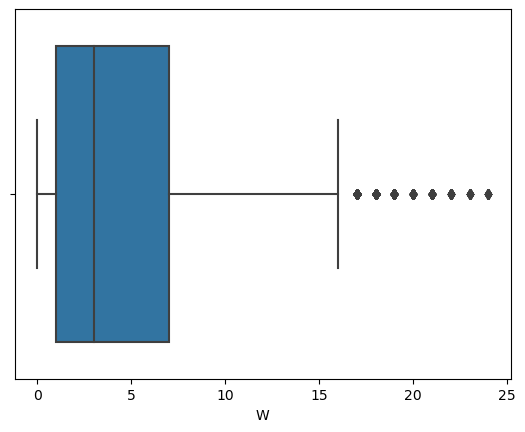

In [18]:
sns.boxplot(x='W', data=df)

<Axes: xlabel='L'>

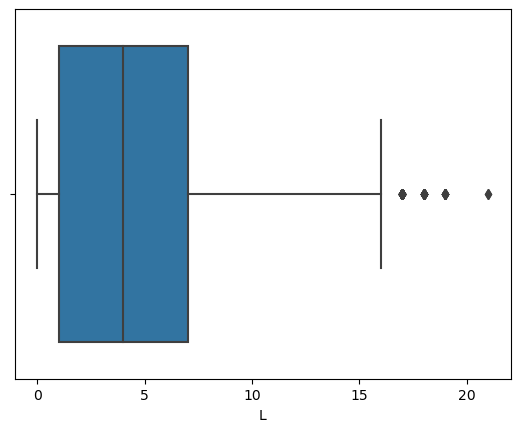

In [19]:
sns.boxplot(x='L', data=df)

<Axes: xlabel='G'>

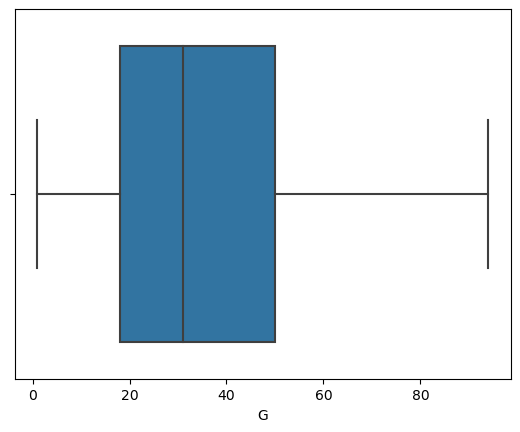

In [20]:
sns.boxplot(x='G', data=df)

<Axes: xlabel='GS'>

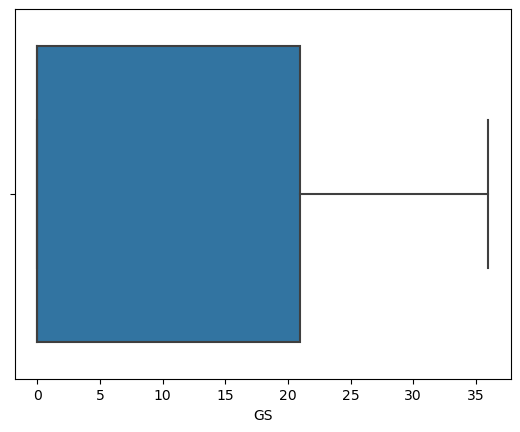

In [21]:
sns.boxplot(x='GS', data=df)

<Axes: xlabel='CG'>

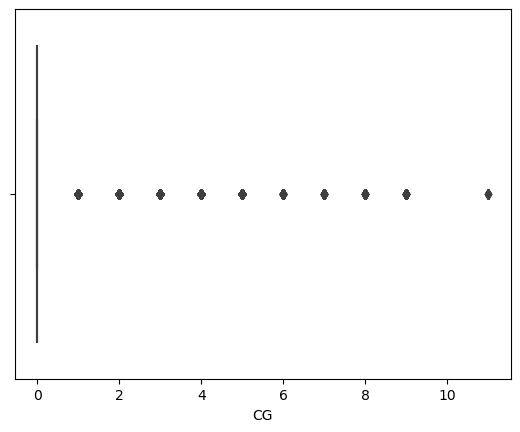

In [22]:
sns.boxplot(x='CG', data=df)

<Axes: xlabel='SHO'>

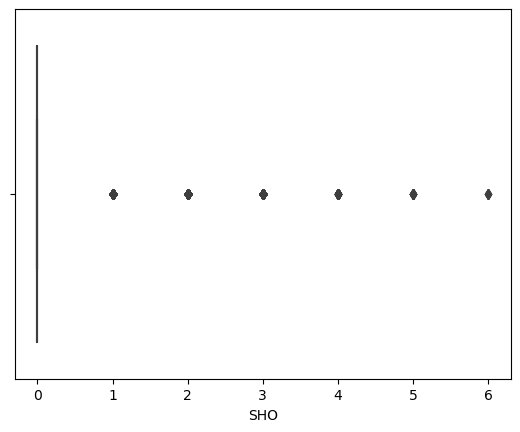

In [23]:
sns.boxplot(x='SHO', data=df)

<Axes: xlabel='SV'>

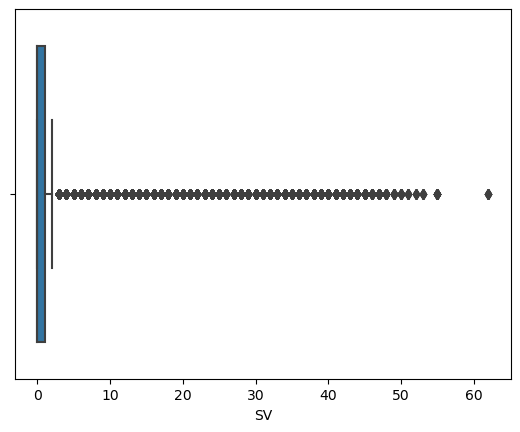

In [24]:
sns.boxplot(x='SV', data=df)

<Axes: xlabel='IPouts'>

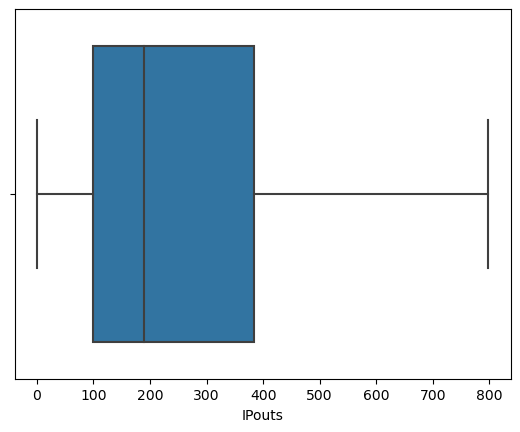

In [25]:
sns.boxplot(x='IPouts', data=df)

<Axes: xlabel='H'>

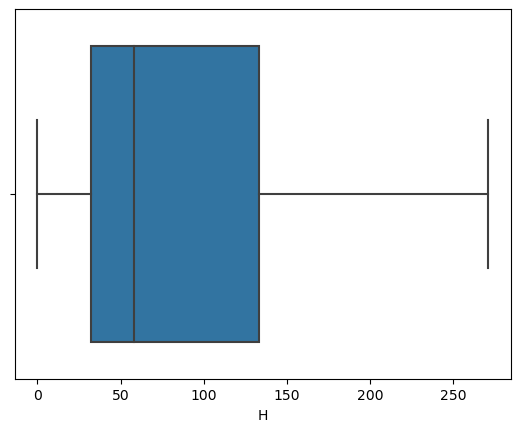

In [26]:
sns.boxplot(x='H', data=df)

<Axes: xlabel='ER'>

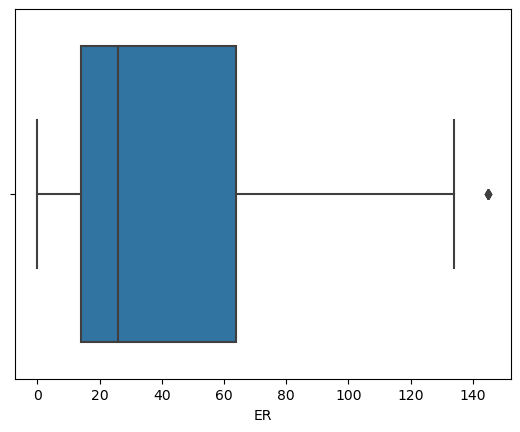

In [27]:
sns.boxplot(x='ER', data=df)

<Axes: xlabel='HR'>

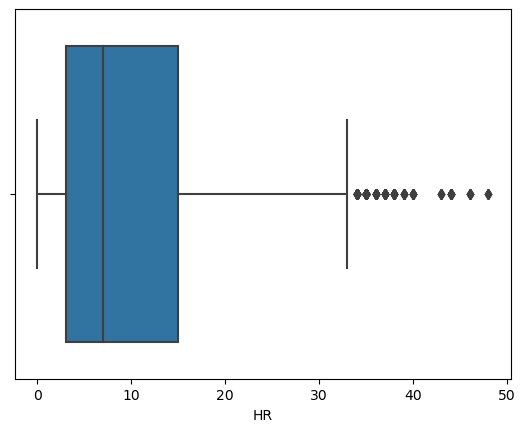

In [28]:
sns.boxplot(x='HR', data=df)

<Axes: xlabel='BB'>

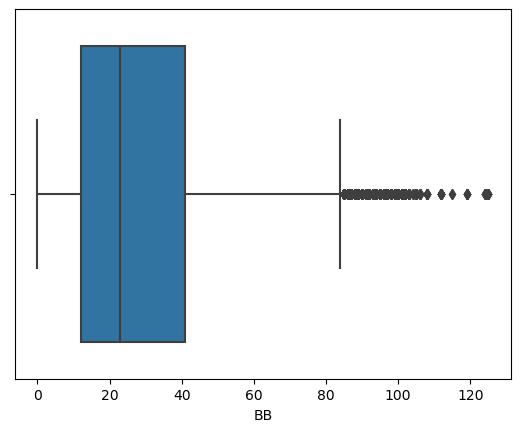

In [29]:
sns.boxplot(x='BB', data=df)

<Axes: xlabel='SO'>

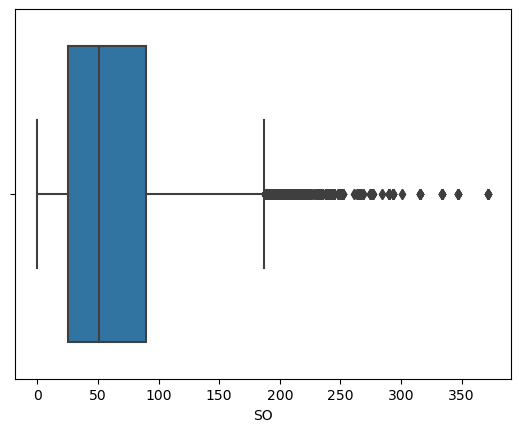

In [30]:
sns.boxplot(x='SO', data=df)

<Axes: xlabel='BAOpp'>

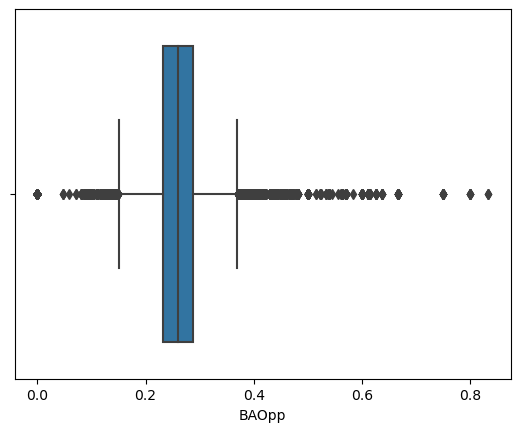

In [31]:
sns.boxplot(x='BAOpp', data=df)

<Axes: xlabel='ERA'>

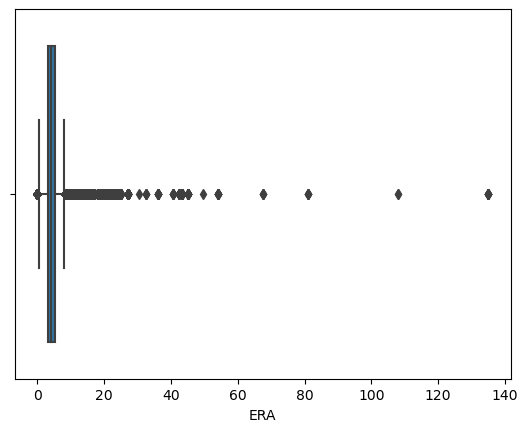

In [32]:
sns.boxplot(x='ERA', data=df)

<Axes: xlabel='IBB'>

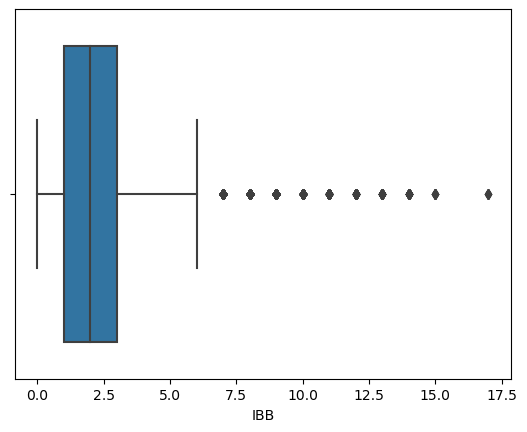

In [33]:
sns.boxplot(x='IBB', data=df)

<Axes: xlabel='WP'>

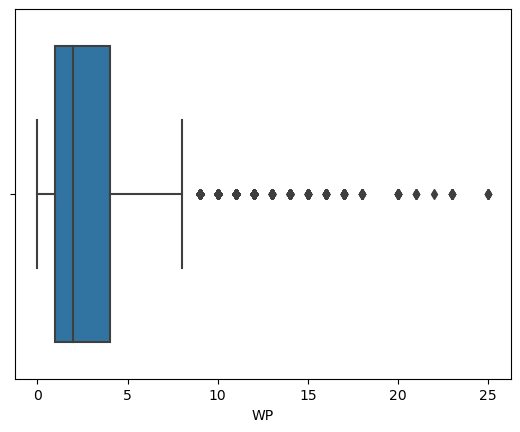

In [34]:
sns.boxplot(x='WP', data=df)

<Axes: xlabel='HBP'>

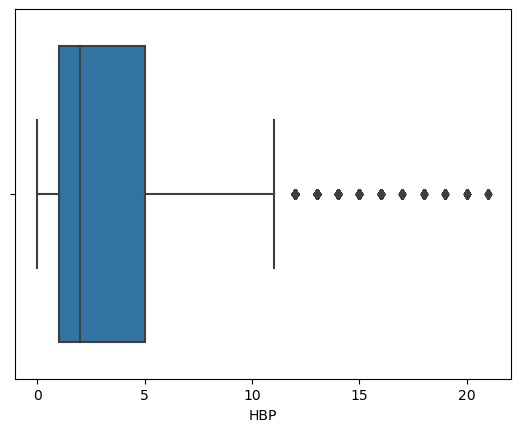

In [35]:
sns.boxplot(x='HBP', data=df)

<Axes: xlabel='BK'>

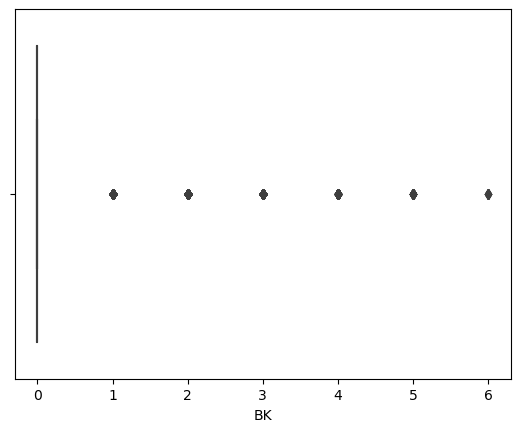

In [36]:
sns.boxplot(x='BK', data=df)

<Axes: xlabel='BFP'>

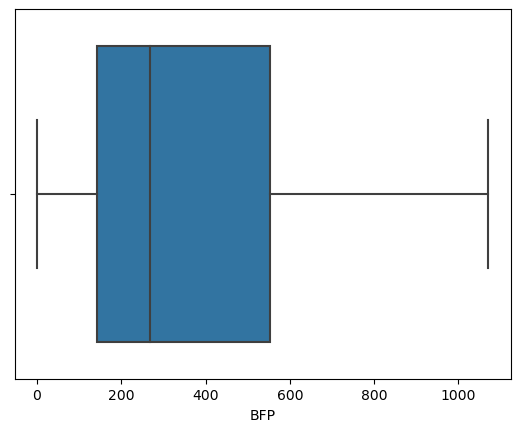

In [37]:
sns.boxplot(x='BFP', data=df)

<Axes: xlabel='GF'>

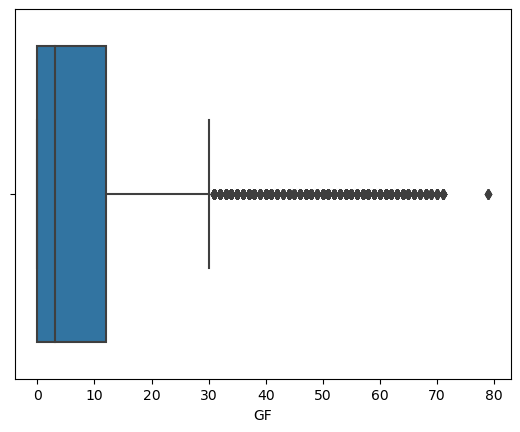

In [38]:
sns.boxplot(x='GF', data=df)

<Axes: xlabel='R'>

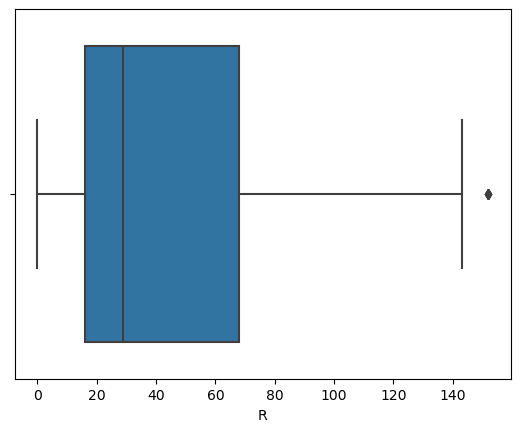

In [39]:
sns.boxplot(x='R', data=df)

<Axes: xlabel='SH'>

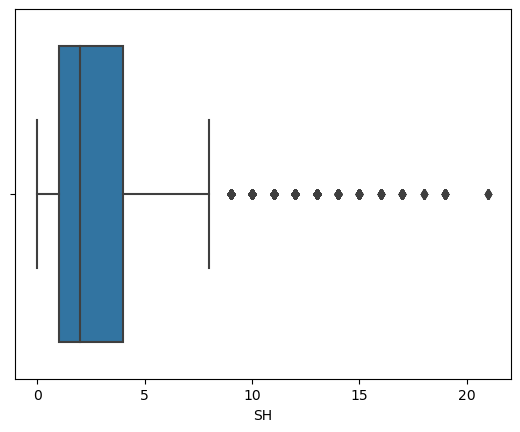

In [40]:
sns.boxplot(x='SH', data=df)

<Axes: xlabel='SF'>

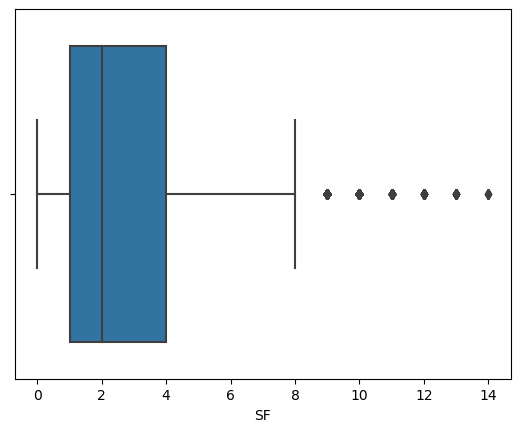

In [41]:
sns.boxplot(x='SF', data=df)

<Axes: xlabel='salary'>

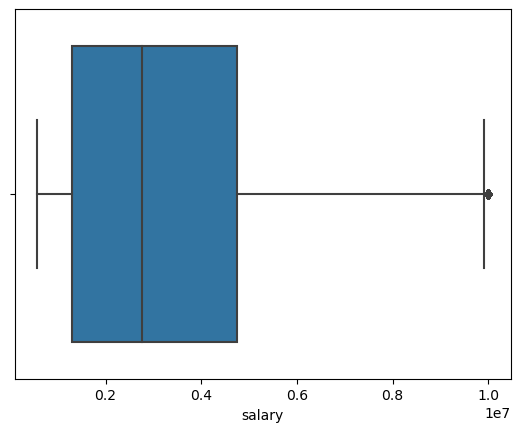

In [42]:
sns.boxplot(x='salary', data=df)

In [43]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outlier_threshold = 1.5
outlier_mask = (df < Q1 - outlier_threshold * IQR) | (df > Q3 + outlier_threshold * IQR)

df = df[outlier_mask.any(axis=1)]
df

W  L   G  GS  CG  SHO  SV  IPouts   H  ER  ...  IBB   WP  HBP  BK  \
3      3  7  62   0   0    0   0   248.0  77  35  ...  9.0  3.0  1.0   2   
4      3  7  62   0   0    0   0   248.0  77  35  ...  9.0  3.0  1.0   2   
5      3  7  62   0   0    0   0   248.0  77  35  ...  9.0  3.0  1.0   2   
12     1  2  54   0   0    0  29   143.0  47  26  ...  2.0  1.0  4.0   0   
13     1  2  54   0   0    0  29   143.0  47  26  ...  2.0  1.0  4.0   0   
...   .. ..  ..  ..  ..  ...  ..     ...  ..  ..  ...  ...  ...  ...  ..   
36520  0  0   3   2   0    0   0    21.0  12   8  ...  0.0  0.0  0.0   0   
36521  0  0   3   2   0    0   0    21.0  12   8  ...  0.0  0.0  0.0   0   
36522  0  0   3   2   0    0   0    21.0  12   8  ...  0.0  0.0  0.0   0   
36523  0  0   3   2   0    0   0    21.0  12   8  ...  0.0  0.0  0.0   0   
36524  0  0   3   2   0    0   0    21.0  12   8  ...  0.0  0.0  0.0   0   

         BFP    GF   R   SH   SF      salary  
3      347.0  18.0  38  1.0  1.0    612500.0  
4      347.0  18.0  38  1.0  1.0    850000.0  
5      347.0  18.0  38  1.0  1.0    900000.0  
12     210.0  44.0  28  1.0  0.0    648000.0  
13     210.0  44.0  28  1.0  0.0   1533333.0  
...      ...   ...  ..  ...  ...         ...  
36520   37.0   1.0   8  0.0  0.0   1000000.0  
36521   37.0   1.0   8  0.0  0.0   3000000.0  
36522   37.0   1.0   8  0.0  0.0   5600000.0  
36523   37.0   1.0   8  0.0  0.0   7900000.0  
36524   37.0   1.0   8  0.0  0.0  10000000.0  

[21589 rows x 25 columns]

<Axes: >

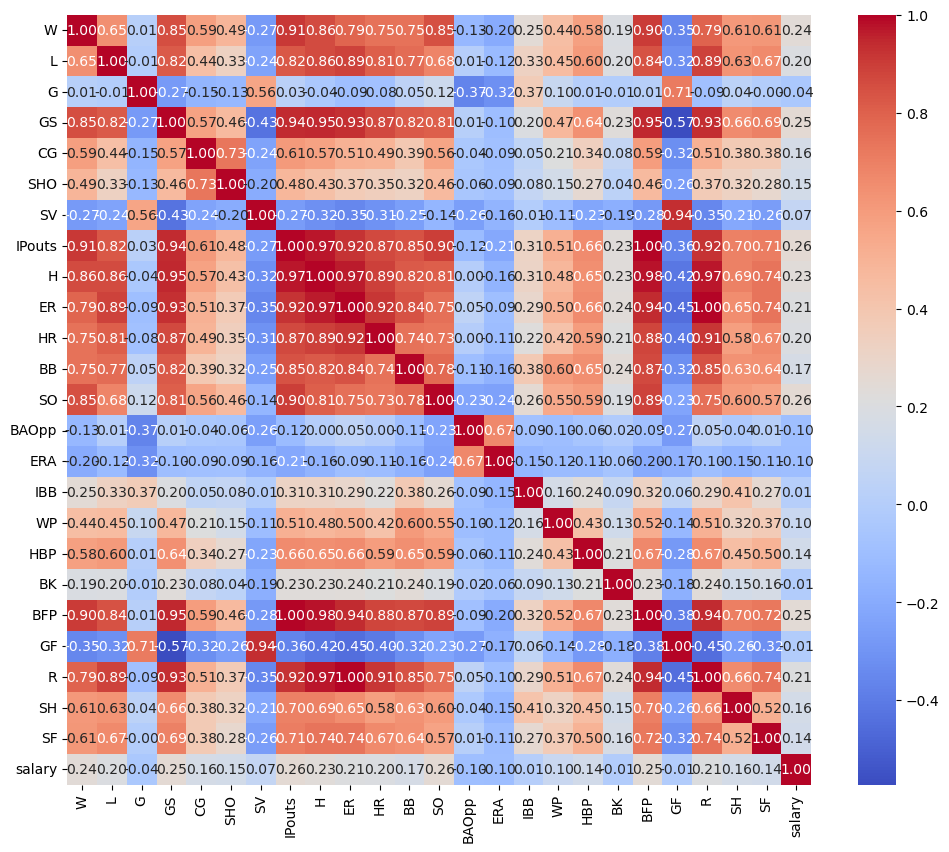

In [44]:
numeric = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric.corr()

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f', ax=ax)

In [45]:
y = df['salary']
X = df.drop('salary', axis=1)

In [46]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

W        L         G        GS        CG       SHO        SV  \
0     -0.641357  0.26412  1.228879 -0.952062 -0.521239 -0.427914 -0.461529   
1     -0.641357  0.26412  1.228879 -0.952062 -0.521239 -0.427914 -0.461529   
2     -0.641357  0.26412  1.228879 -0.952062 -0.521239 -0.427914 -0.461529   
3     -1.009085 -0.91668  0.850505 -0.952062 -0.521239 -0.427914  2.085336   
4     -1.009085 -0.91668  0.850505 -0.952062 -0.521239 -0.427914  2.085336   
...         ...      ...       ...       ...       ...       ...       ...   
21584 -1.192949 -1.38900 -1.561631 -0.810570 -0.521239 -0.427914 -0.461529   
21585 -1.192949 -1.38900 -1.561631 -0.810570 -0.521239 -0.427914 -0.461529   
21586 -1.192949 -1.38900 -1.561631 -0.810570 -0.521239 -0.427914 -0.461529   
21587 -1.192949 -1.38900 -1.561631 -0.810570 -0.521239 -0.427914 -0.461529   
21588 -1.192949 -1.38900 -1.561631 -0.810570 -0.521239 -0.427914 -0.461529   

         IPouts         H        ER  ...       ERA       IBB        WP  \
0     -0.323757 -0.377692 -0.374083  ... -0.194141  2.488401 -0.085023   
1     -0.323757 -0.377692 -0.374083  ... -0.194141  2.488401 -0.085023   
2     -0.323757 -0.377692 -0.374083  ... -0.194141  2.488401 -0.085023   
3     -0.803209 -0.780155 -0.637492  ...  0.028955 -0.268921 -0.706618   
4     -0.803209 -0.780155 -0.637492  ...  0.028955 -0.268921 -0.706618   
...         ...       ...       ...  ...       ...       ...       ...   
21584 -1.360287 -1.249696 -1.164309  ...  1.120099 -1.056727 -1.017415   
21585 -1.360287 -1.249696 -1.164309  ...  1.120099 -1.056727 -1.017415   
21586 -1.360287 -1.249696 -1.164309  ...  1.120099 -1.056727 -1.017415   
21587 -1.360287 -1.249696 -1.164309  ...  1.120099 -1.056727 -1.017415   
21588 -1.360287 -1.249696 -1.164309  ...  1.120099 -1.056727 -1.017415   

            HBP        BK       BFP        GF         R        SH        SF  
0     -0.790475  2.080499 -0.343494  0.375495 -0.375653 -0.800385 -0.777648  
1     -0.790475  2.080499 -0.343494  0.375495 -0.375653 -0.800385 -0.777648  
2     -0.790475  2.080499 -0.343494  0.375495 -0.375653 -0.800385 -0.777648  
3      0.023761 -0.621453 -0.789390  1.831766 -0.645875 -0.800385 -1.161204  
4      0.023761 -0.621453 -0.789390  1.831766 -0.645875 -0.800385 -1.161204  
...         ...       ...       ...       ...       ...       ...       ...  
21584 -1.061887 -0.621453 -1.352454 -0.576682 -1.186318 -1.075331 -1.161204  
21585 -1.061887 -0.621453 -1.352454 -0.576682 -1.186318 -1.075331 -1.161204  
21586 -1.061887 -0.621453 -1.352454 -0.576682 -1.186318 -1.075331 -1.161204  
21587 -1.061887 -0.621453 -1.352454 -0.576682 -1.186318 -1.075331 -1.161204  
21588 -1.061887 -0.621453 -1.352454 -0.576682 -1.186318 -1.075331 -1.161204  

[21589 rows x 24 columns]

In [47]:
k = 23
selector = SelectKBest(score_func=f_regression, k=k)
selector.fit(X_scaled, y)
selected_indices = selector.get_support(indices = True)
selected_features = X_scaled.columns[selected_indices]
selected_score = selector.scores_[selected_indices]
print(selected_features)
print(selected_score)

Index(['W', 'L', 'G', 'GS', 'CG', 'SHO', 'SV', 'IPouts', 'H', 'ER', 'HR', 'BB',
       'SO', 'BAOpp', 'ERA', 'WP', 'HBP', 'BK', 'BFP', 'GF', 'R', 'SH', 'SF'],
      dtype='object')
[1336.87368028  869.64642766   34.37050841 1486.06972237  586.92639703
  509.04944006  119.01300244 1506.91092205 1256.62904115  956.15752326
  902.00726251  629.13105297 1501.73336882  206.92538042  221.71332773
  219.01330398  453.39616627    3.09549465 1417.97014277    3.84169481
  958.35685529  549.04418745  449.44106093]


In [48]:
p_values = pd.DataFrame({'Feature': X.columns, 'p_value':
                         selector.pvalues_}).sort_values('p_value')
p_values[p_values['p_value']<0.05]
kept_feats = p_values['Feature'][p_values['p_value']<0.05]

print(p_values, '\n\n')

   Feature        p_value
7   IPouts  1.051080e-318
12      SO  1.184081e-317
3       GS  1.805829e-314
19     BFP  1.323949e-300
0        W  4.869812e-284
8        H  1.373015e-267
21       R  6.348806e-206
9       ER  1.821667e-205
10      HR  3.515358e-194
1        L  2.012099e-187
11      BB  7.029573e-137
4       CG  5.958125e-128
22      SH  6.372436e-120
5      SHO  1.982782e-111
17     HBP   1.390591e-99
23      SF   9.689540e-99
14     ERA   6.767712e-50
16      WP   2.590778e-49
13   BAOpp   1.058623e-46
6       SV   1.228542e-27
2        G   4.622065e-09
20      GF   5.000581e-02
18      BK   7.852345e-02
15     IBB   1.915387e-01 




In [49]:
X_scaled = X_scaled[selected_features]
y.reset_index(drop=True, inplace=True)
X_scaled.reset_index(drop=True, inplace=True)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [51]:
X_train = sm.add_constant(X_train)

In [52]:
model = sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     116.7
Date:                Wed, 23 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:17:06   Log-Likelihood:            -2.7858e+05
No. Observations:               17271   AIC:                         5.572e+05
Df Residuals:                   17247   BIC:                         5.574e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.775e+06   1.86e+04    202.494      0.000    3.74e+06    3.81e+06
W           1.321e+05   5.24e+04      2.522      0.012    2.94e+04    2.35e+05
L           7.413e+04   4.48e+04      1.653      0.098   -1.38e+04    1.62e+05
G          -2.247e+05   5.87e+04     -3.827      0.000    -3.4e+05    -1.1e+05
GS          1.052e+06   1.85e+05      5.689      0.000     6.9e+05    1.41e+06
CG          -1.36e+05    3.3e+04     -4.117      0.000   -2.01e+05   -7.12e+04
SHO         6.378e+04   2.81e+04      2.272      0.023    8765.509    1.19e+05
SV          8.346e+05   7.48e+04     11.159      0.000    6.88e+05    9.81e+05
IPouts      7.418e+05   9.81e+05      0.756      0.450   -1.18e+06    2.67e+06
H          -3.984e+04   3.31e+05     -0.120      0.904   -6.88e+05    6.08e+05
ER          3.461e+05   2.46e+05      1.405      0.160   -1.37e+05    8.29e+05
HR         -2.067e+05    5.2e+04     -3.976      0.000   -3.09e+05   -1.05e+05
BB         -3.885e+05   1.01e+05     -3.856      0.000   -5.86e+05   -1.91e+05
SO          1.834e+05   5.98e+04      3.067      0.002    6.62e+04    3.01e+05
BAOpp      -1.243e+05   2.91e+04     -4.269      0.000   -1.81e+05   -6.72e+04
ERA        -5.505e+04   2.64e+04     -2.089      0.037   -1.07e+05   -3399.640
WP         -3.522e+04   2.47e+04     -1.426      0.154   -8.36e+04    1.32e+04
HBP         2.409e+04   2.99e+04      0.804      0.421   -3.46e+04    8.28e+04
BK         -9.349e+04   1.95e+04     -4.785      0.000   -1.32e+05   -5.52e+04
BFP        -6.475e+05   1.37e+06     -0.474      0.636   -3.33e+06    2.03e+06
GF         -2.322e+05   9.87e+04     -2.353      0.019   -4.26e+05   -3.88e+04
R          -3.075e+05   2.64e+05     -1.163      0.245   -8.25e+05    2.11e+05
SH         -1.159e+04   2.75e+04     -0.422      0.673   -6.55e+04    4.23e+04
SF         -5.631e+04   2.84e+04     -1.981      0.048   -1.12e+05    -607.312
==============================================================================
Omnibus:                     1032.998   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1205.613
Skew:                           0.638   Prob(JB):                    1.60e-262
Kurtosis:                       2.783   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
X_test = sm.add_constant(X_test)
y_pred = model.predict(X_test)

In [54]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

2455650.7180737285

In [55]:
r2 = r2_score(y_test, y_pred)
r2

0.11965908425506655

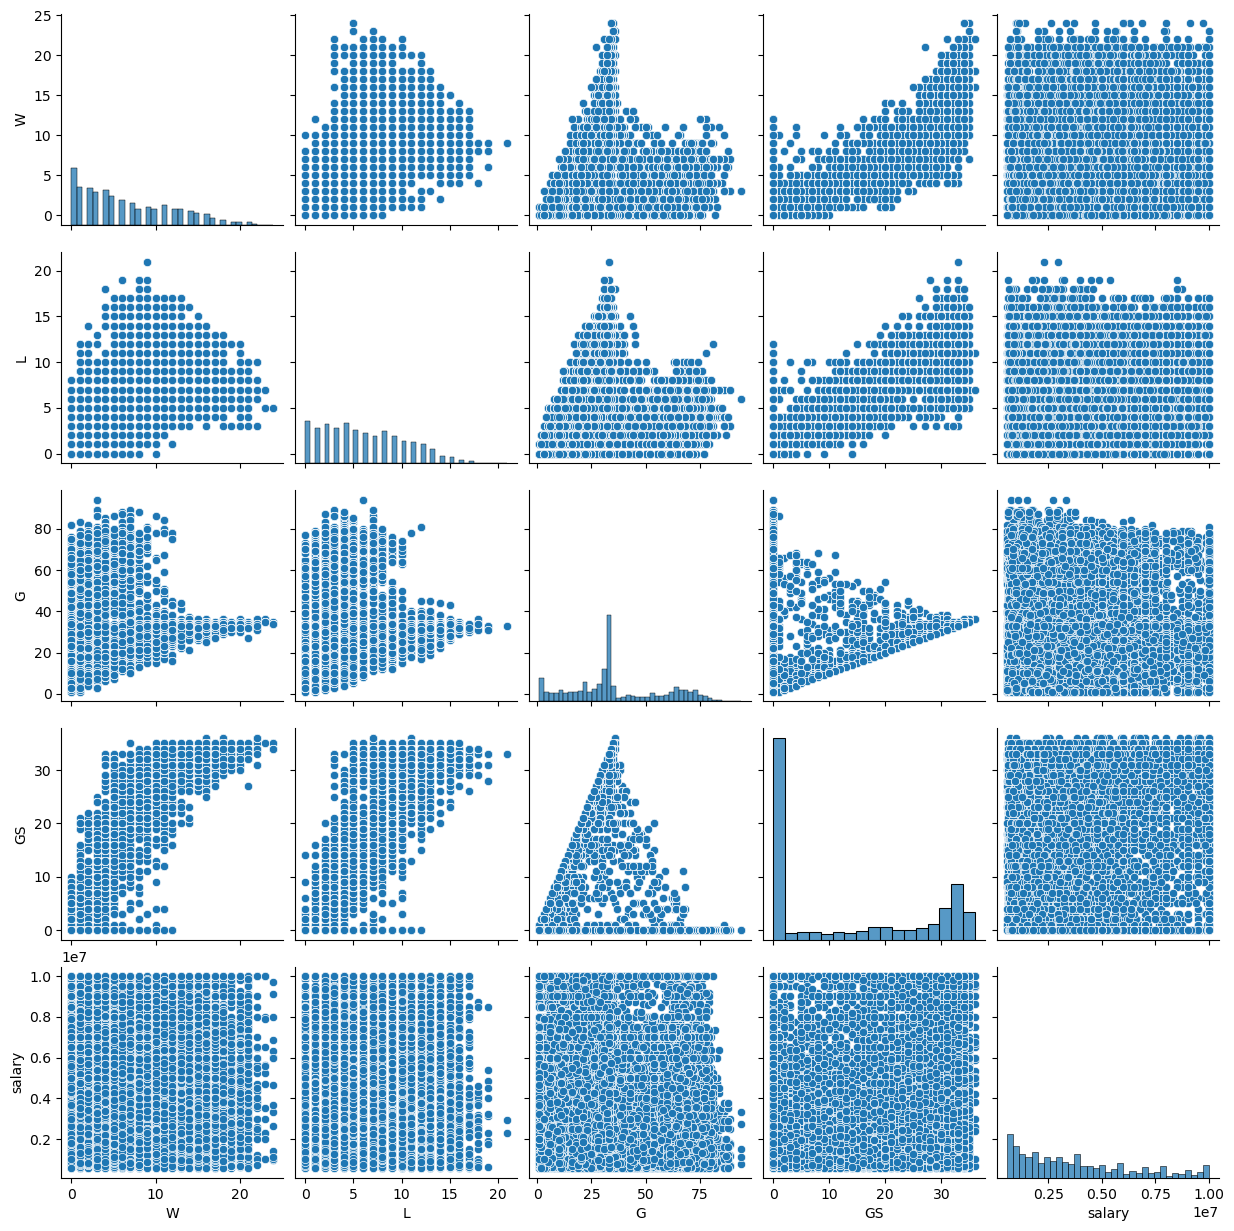

In [57]:
sns.pairplot(df, vars=['W', 'L', 'G', 'GS', 'salary'])
plt.show()

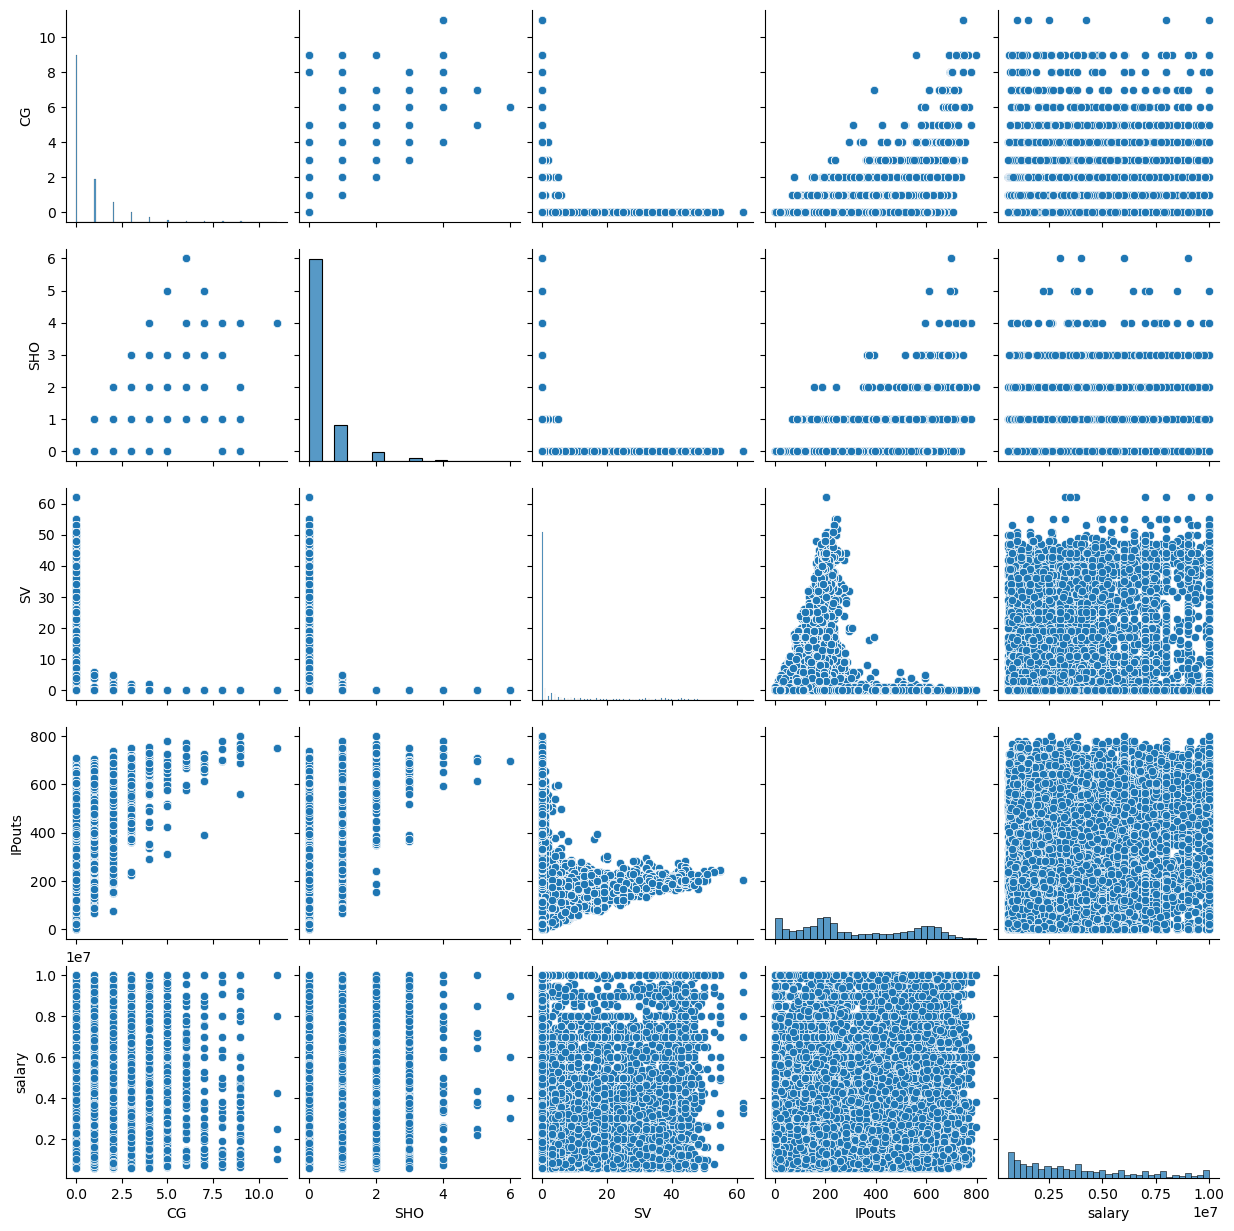

In [58]:
sns.pairplot(df, vars=['CG', 'SHO', 'SV', 'IPouts', 'salary'])
plt.show()

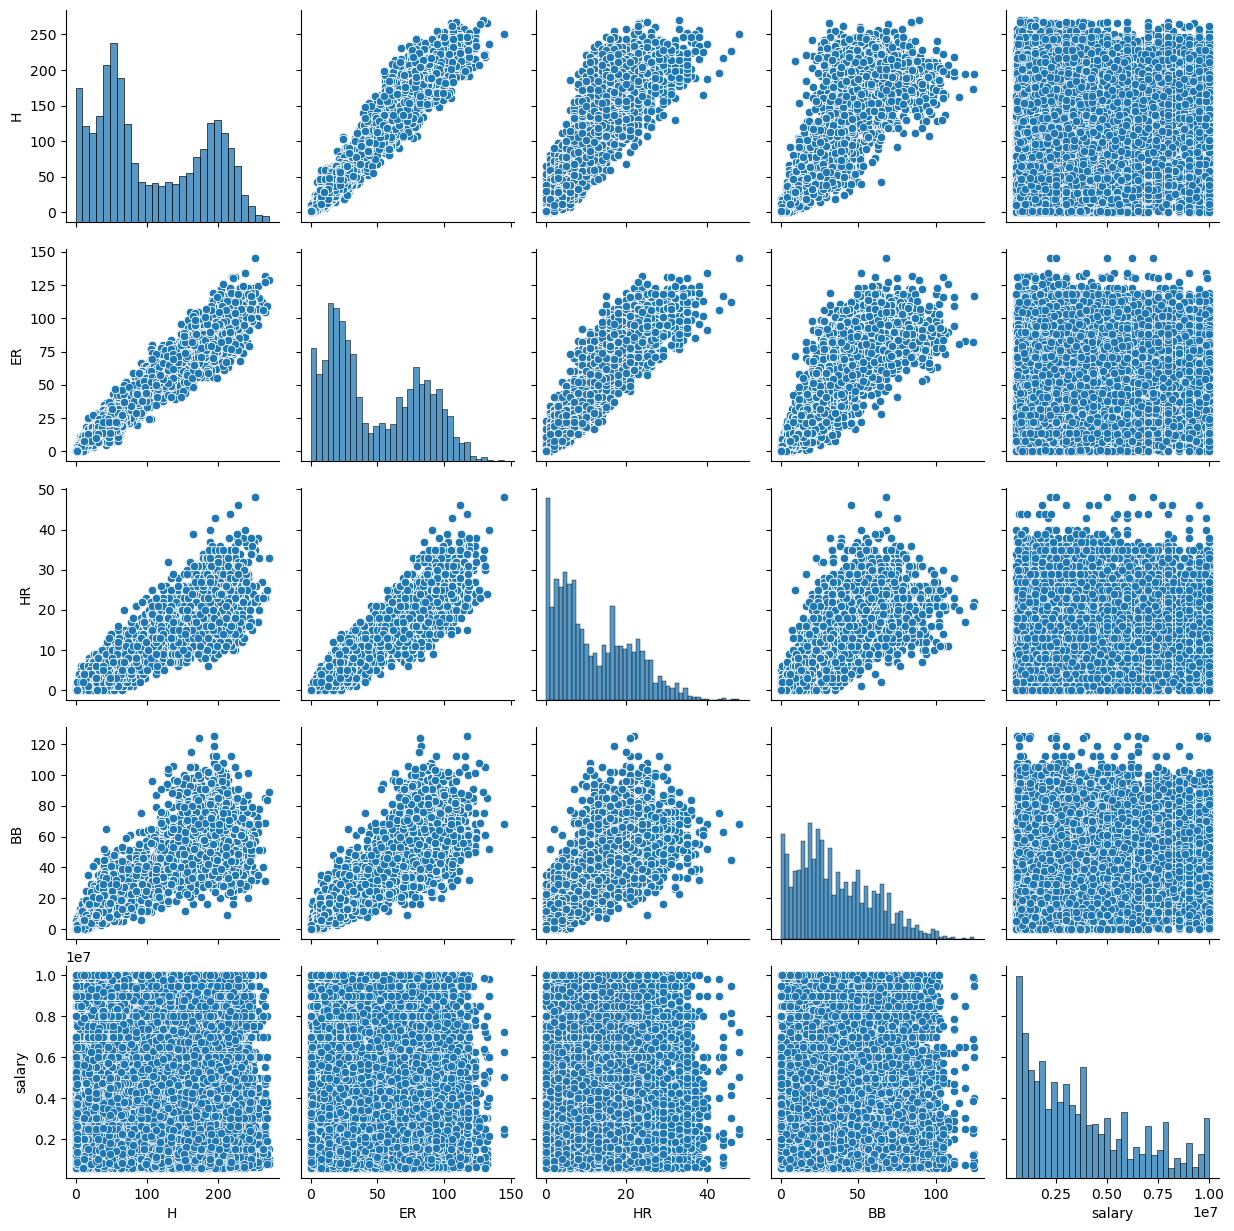

In [59]:
sns.pairplot(df, vars=['H', 'ER', 'HR', 'BB', 'salary'])
plt.show()

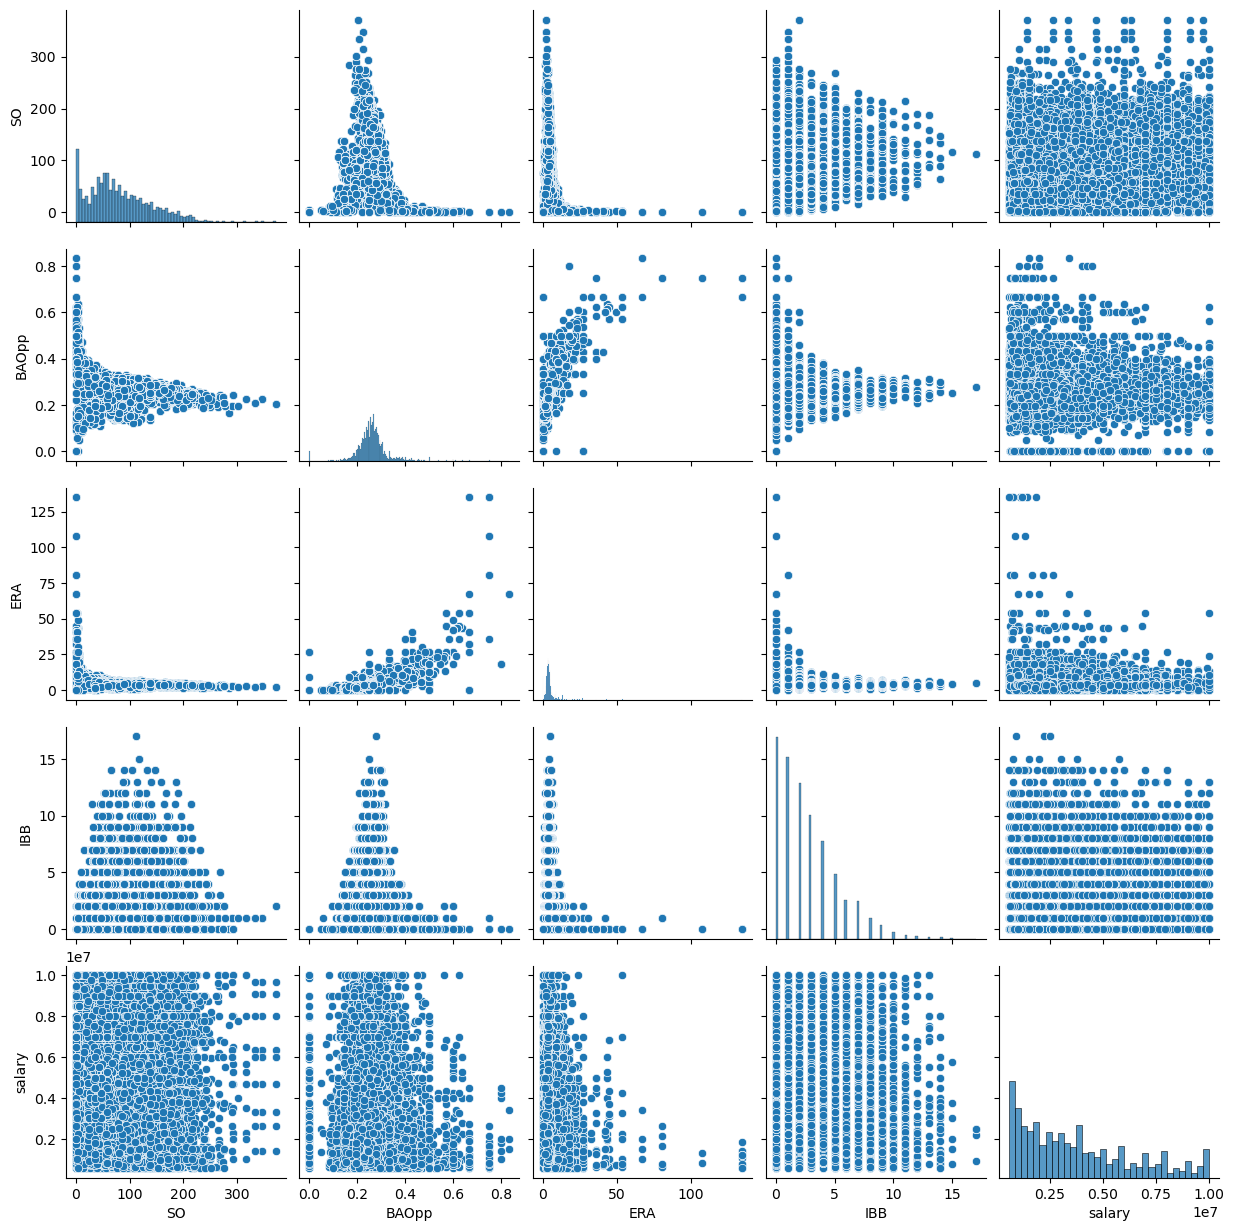

In [60]:
sns.pairplot(df, vars=['SO', 'BAOpp', 'ERA', 'IBB', 'salary'])
plt.show()

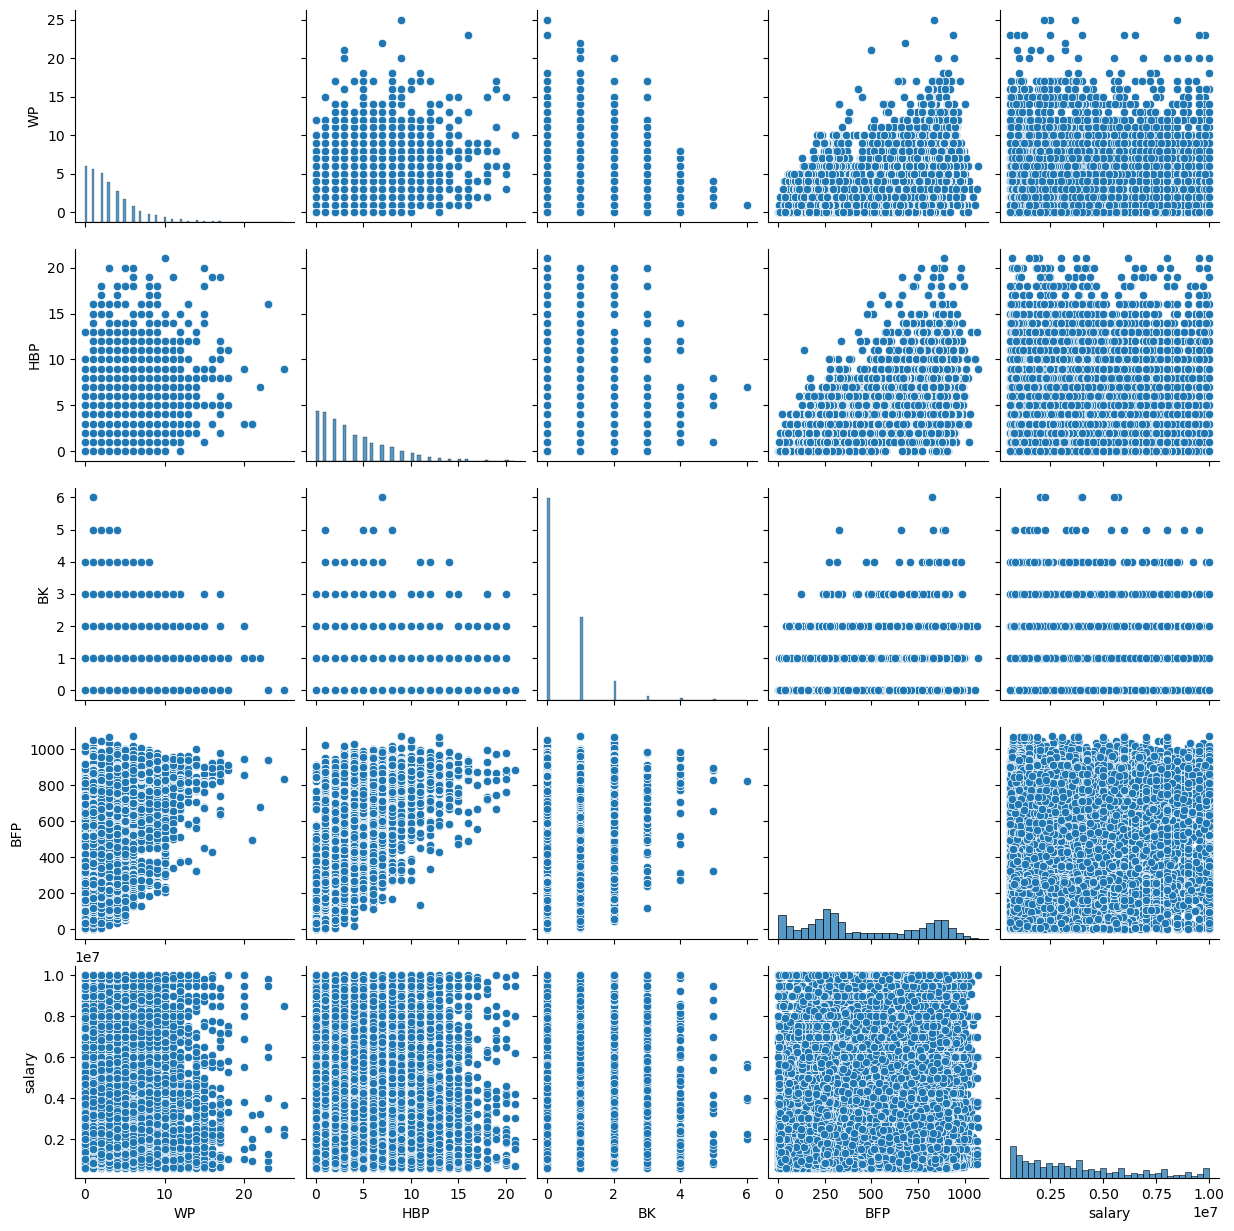

In [61]:
sns.pairplot(df, vars=['WP', 'HBP', 'BK', 'BFP', 'salary'])
plt.show()

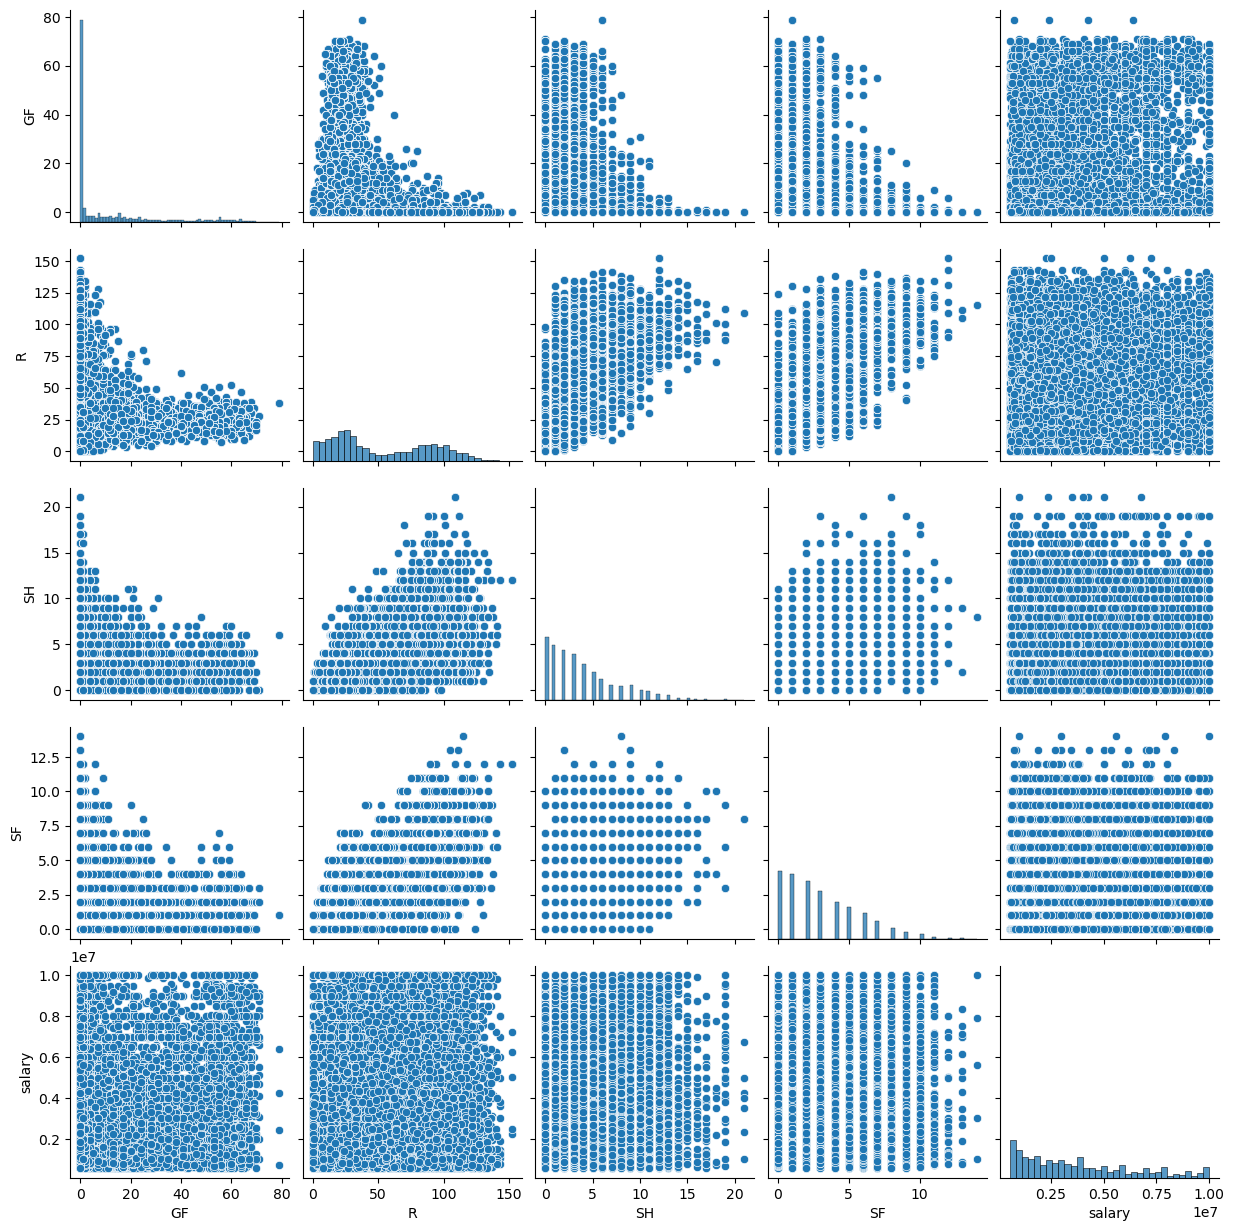

In [62]:
sns.pairplot(df, vars=['GF', 'R', 'SH', 'SF', 'salary'])
plt.show()

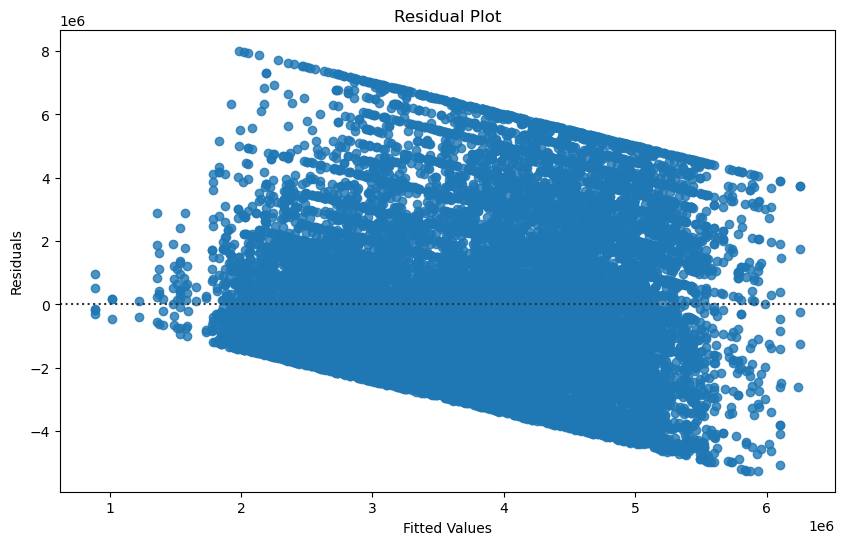

In [63]:
plt.figure(figsize=(10, 6))
sns.residplot(x=model.fittedvalues, y=model.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

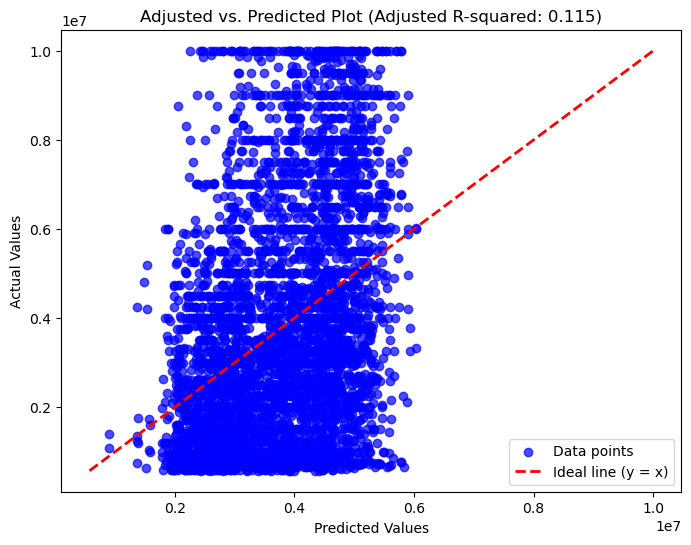

In [64]:
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_test, alpha=0.7, color='blue', label='Data points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2,
         label='Ideal line (y = x)')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title(f'Adjusted vs. Predicted Plot (Adjusted R-squared: {adjusted_r2:.3f})')
plt.legend()
plt.show()